# Data analysis and visualization of the Teaching and Learning International Survey (TALIS) 2018 

## Importing

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

Since the data downloaded from http://www.oecd.org/education/talis/talis-2018-data.htm are SPSS files, I use pyreadstat.read_sav to import and read them.

The dataset BTGINTT3.sav includes international data about teachers in lower secondary education .

In [3]:
import pyreadstat
df, meta = pyreadstat.read_sav('BTGINTT3.sav')

The data I need for my analysis are captured in the following questions of TALIS:
TT3G06G1: 
- Q: Were the following elements included in your formal education or training? -- Teaching cross-curricular skills (e.g. creativity, critical thinking, problem solving)
- A: Inclusion in education or training: Yes (1), No (2)
    
TT3G06G2:
- Q: To what extent did you feel prepared for each element in your teaching? -- Teaching cross-curricular skills (e.g. creativity, critical thinking, problem solving)
    - A: Preparedness: Not at all (1), Somewhat (2), Well (3), Very well (4)

TT3G23K: 
- Q:Were any of the topics listed below included in your professional development activities during the last 12 months? -- Teaching cross-curricular skills (e.g. creativity, critical thinking, problem solving)
- A: Yes (1), No (2)

TT3G27K: 
- Q: For each of the areas listed below, please indicate the extent to which you currently need professional development. -- Teaching cross-curricular skills (e.g. creativity, critical thinking, problem solving)
- A: No need at present (1), Low level of need (2), Moderate level of need (3), High level of need (4)

TT3G37: 
- Q: Into which subject category does this *target class* primarily fall?
- A: Reading, writing and literature (1), Mathematics (2), Science(3), Social studies (4), Modern foreign langauge (5), Ancient Greek and/or Latin (6), Technology (7), Arts (8), Physical education (9), Religion and/or ethics (10), Practical and vocational skills (11), Other (12) 

TT3G11B: 
- Q: How many years of work experience do you have, regardless of whether you worked full- time or part-time? -- Year(s) working as a teacher in total
- A: open (numerical)

CNTRY: Country ID

In [4]:
rq = df[['TT3G06G1', 'TT3G06G2', 'TT3G23K', 'TT3G27K', 'TT3G37', 'CNTRY', 'TT3G11B']].copy()

In [5]:
rq.columns = ['formal_ed', 'preparedness', 'prof_dev_received', 'prof_dev_needed', 'subject_class', 'country', 'teaching_exp']

In [6]:
rq.head()

,formal_ed,preparedness,prof_dev_received,prof_dev_needed,subject_class,country,teaching_exp
0,1.0,2.0,1.0,2.0,NaN,ABA,12.0
1,1.0,4.0,1.0,1.0,8.0,ABA,23.0
2,1.0,4.0,2.0,2.0,4.0,ABA,4.0
3,1.0,3.0,2.0,4.0,4.0,ABA,2.0
4,1.0,3.0,1.0,1.0,4.0,ABA,12.0


In [7]:
rq.subject_class = rq.subject_class.map({1.0: 'L1 reading/writing/litearture', 2.0: 'mathematics', 3.0: 'science', 4.0: 'social studies', 5.0: 'modern foreign languages', 6.0: 'ancient greek/latin', 7.0: 'technology', 8.0: 'arts', 9.0: 'physical education', 10.0: 'religion/ethics', 11.0: 'practical/vocational skills', 12.0: 'other'})

In [8]:
rq = rq[rq.subject_class != 'other']

In [9]:
rq.subject_class.value_counts()

L1 reading/writing/litearture    23710
mathematics                      18239
modern foreign languages         16582
science                          16012
social studies                   14191
arts                             10040
physical education                9774
technology                        6442
religion/ethics                   4718
practical/vocational skills       3053
ancient greek/latin                683
Name: subject_class, dtype: int64

In [10]:
rq.formal_ed = rq.formal_ed.map({1.0: 1, 2.0:0})
rq.prof_dev_received = rq.prof_dev_received.map({1.0: 1, 2.0:0})

In [11]:
test = df[['TT3G06A1', 'TT3G06B1', 'TT3G06C1', 'TT3G06D1', 'TT3G06E1', 'TT3G06F1', 'TT3G06G1', 'TT3G06H1', 'TT3G06I1', 'TT3G06K1', 'TT3G06K1', 'TT3G06L1', 'CNTRY']].copy()
test.columns = ['content_subject', 'pedagogy_subject', 'gen_pedagogy', 'classroom_practice', 'mixed_ability', 'multicultural', 'cross_curricular', 'ict', 'behaviour_man', 'monitoring_learning', 'transition', 'play', 'country']
test.cross_curricular = test.cross_curricular.map({1.0: 1, 2.0:0})

## How well prepared are teachers (of all subjects and countries) to teach cross-curricular skills?

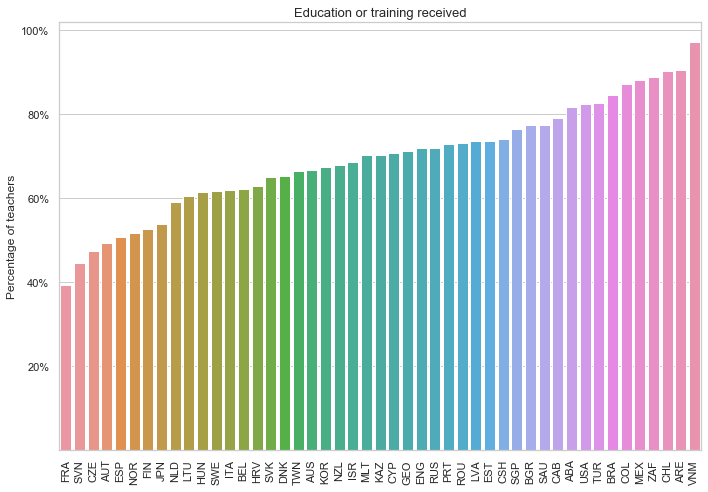

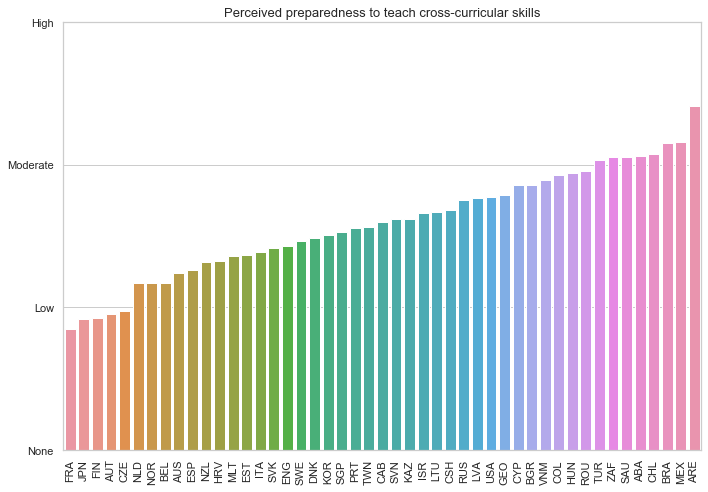

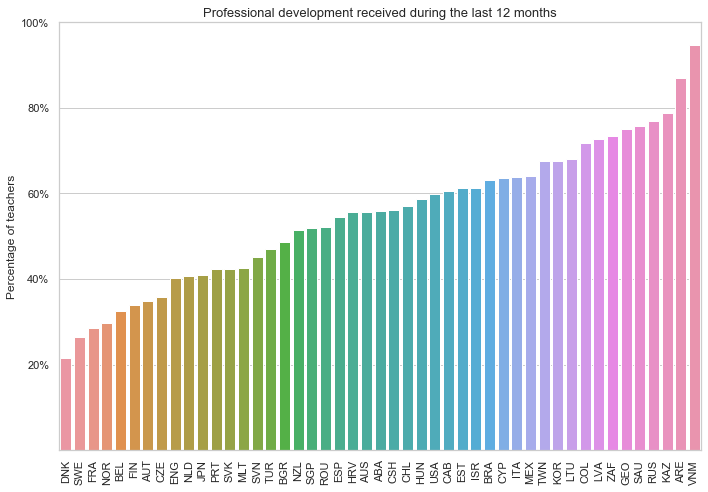

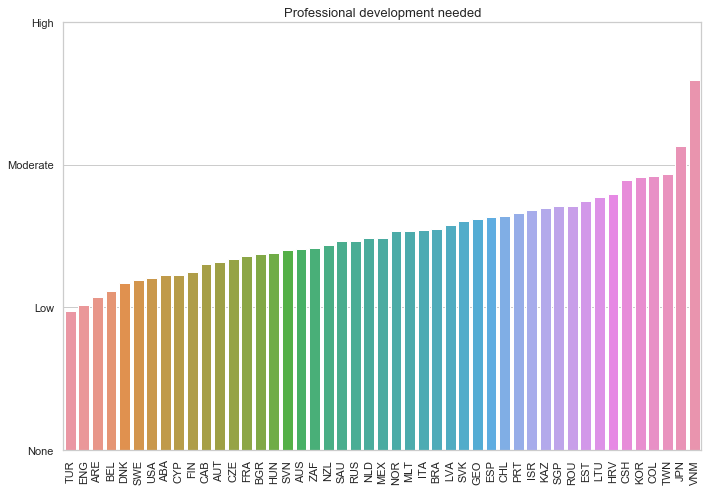

In [13]:
columns = ['formal_ed', 'preparedness', 'prof_dev_received', 'prof_dev_needed']
titles = ['Education or training received', 'Perceived preparedness to teach cross-curricular skills', 'Professional development received during the last 12 months', 'Professional development needed']

for i in range(len(columns)):
    f, ax = plt.subplots(figsize = (10, 7))
    data = rq.dropna(subset = [columns[i]]).groupby(['country'])[columns[i]].mean().reset_index().sort_values(columns[i])
    sns.barplot(x = 'country', y = columns[i], data = data)
    
    sns.set_style('whitegrid')
    sns.set_context('notebook', rc = {'axes.titlesize': 13})
    
    plt.xticks(rotation=90)
    plt.xlabel('')
    plt.title(titles[i])
    
    if columns[i] == 'preparedness' or columns[i] == 'prof_dev_needed':
        ax.set_yticks(range(5))
        ax.set_yticklabels(['X', 'None', 'Low', 'Moderate', 'High'])
        plt.ylim(1, 4)
        plt.ylabel('')
    
    else:
        plt.ylabel('Percentage of teachers')
        ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1])
        ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'])
    
    plt.tight_layout()
    plt.show();
    
    #plt.savefig('rq_all_subj_global_{}.png'.format(columns[i]))

## How well prepared are language teachers globally to teach cross-curricular skills?

In [67]:
rq_lang = rq[rq.subject_class == 'modern foreign languages'].copy()

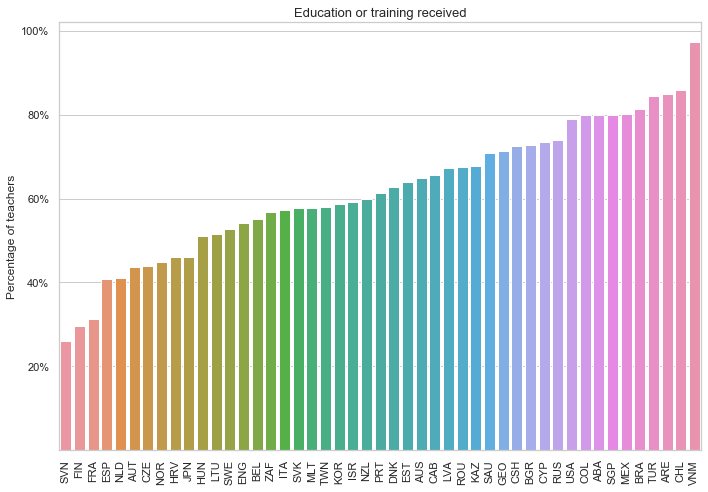

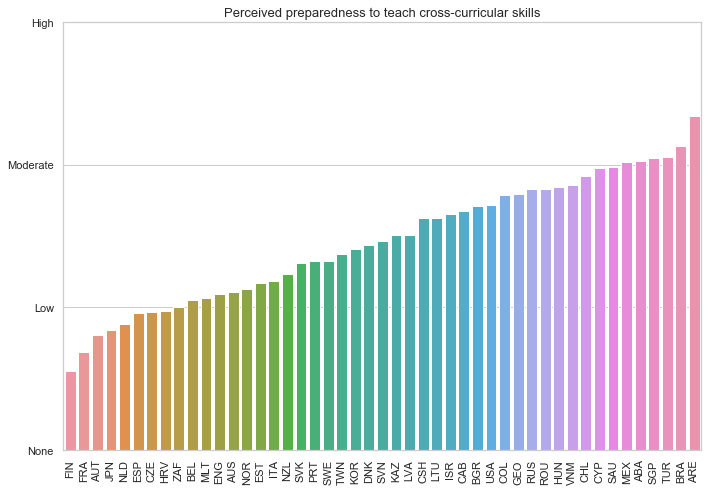

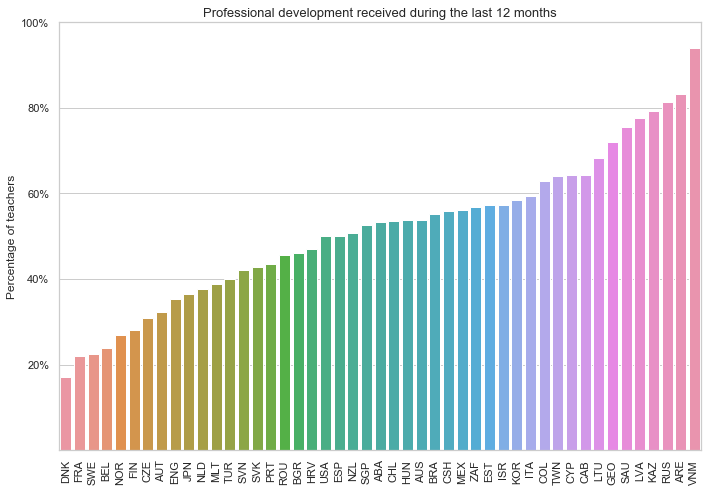

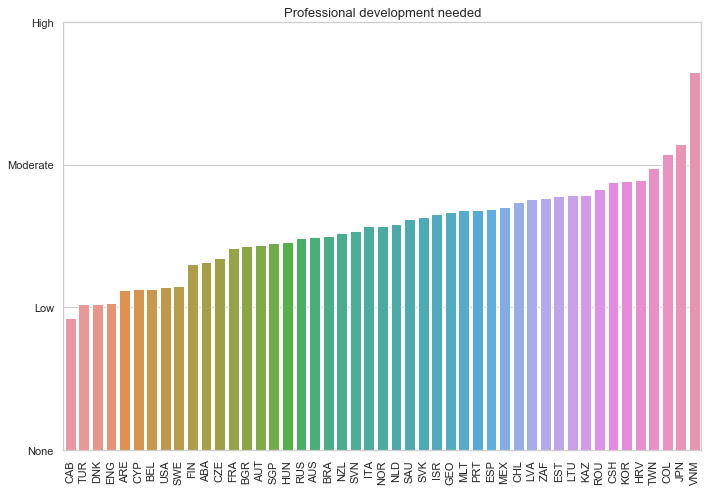

In [155]:
columns = ['formal_ed', 'preparedness', 'prof_dev_received', 'prof_dev_needed']
titles = ['Education or training received', 'Perceived preparedness to teach cross-curricular skills', 'Professional development received during the last 12 months', 'Professional development needed']

for i in range(len(columns)):
    f, ax = plt.subplots(figsize = (10, 7))
    data = rq_lang.dropna(subset = [columns[i]]).groupby(['country'])[columns[i]].mean().reset_index().sort_values(columns[i])
    sns.barplot(x = 'country', y = columns[i], data = data)
    
    sns.set_style('whitegrid')
    sns.set_context('notebook', rc = {'axes.titlesize': 13})
    
    plt.xticks(rotation=90)
    plt.xlabel('')
    plt.title(titles[i])
    
    if columns[i] == 'preparedness' or columns[i] == 'prof_dev_needed':
        ax.set_yticks(range(5))
        ax.set_yticklabels(['X', 'None', 'Low', 'Moderate', 'High'])
        plt.ylim(1, 4)
        plt.ylabel('')
   
    else:
        plt.ylabel('Percentage of teachers')
        ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1])
        ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'])
    
    plt.tight_layout()
    plt.show();
    
    #plt.savefig('rq_only_lang_global{}.png'.format(columns[i]));

## How well prepared are foreign language teachers globally to teach cross-curricular skills compared to teachers of other subjects?

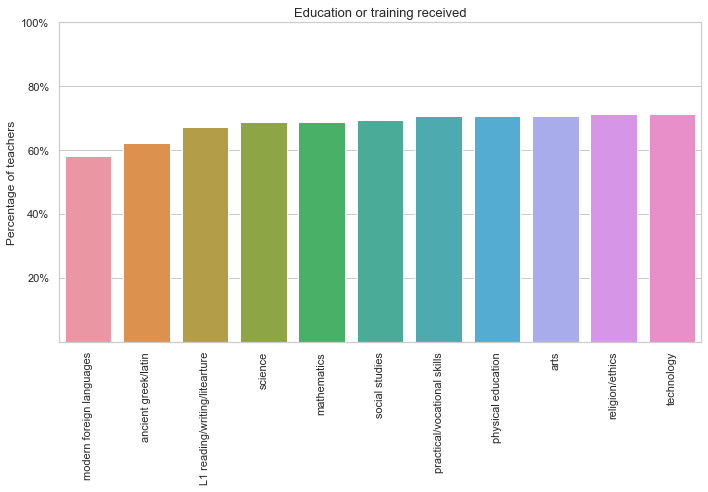

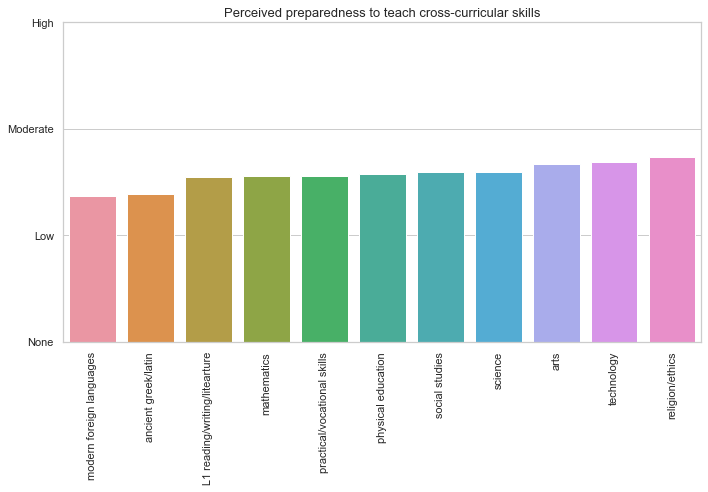

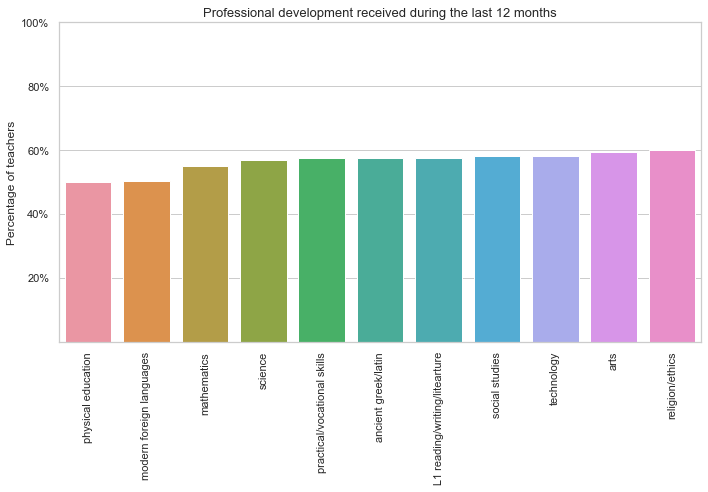

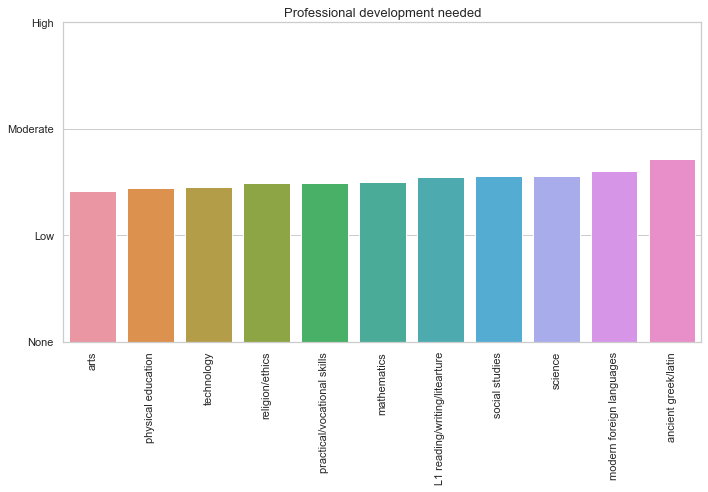

In [14]:
columns = ['formal_ed', 'preparedness', 'prof_dev_received', 'prof_dev_needed']
titles = ['Education or training received', 'Perceived preparedness to teach cross-curricular skills', 'Professional development received during the last 12 months', 'Professional development needed']
for i in range(len(columns)):
    f, ax = plt.subplots(figsize = (10, 7))
    data = rq.dropna(subset = [columns[i]]).groupby(['subject_class'])[columns[i]].mean().reset_index().sort_values(columns[i])
    sns.barplot(x = 'subject_class', y = columns[i], data = data)
    
    sns.set_style('whitegrid')
    sns.set_context('notebook', rc = {'axes.titlesize': 13})
    
    plt.xticks(rotation=90)
    plt.xlabel('')
    plt.title(titles[i])
    
    if columns[i] == 'preparedness' or columns[i] == 'prof_dev_needed':
        ax.set_yticks(range(5))
        ax.set_yticklabels(['X', 'None', 'Low', 'Moderate', 'High'])
        plt.ylim(1, 4)
        plt.ylabel('')
    
    else:
        plt.ylabel('Percentage of teachers')
        ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1])
        ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'])
    
    plt.tight_layout()
    plt.show();
    
    #plt.savefig('rq_lang_compared_to_subj_global{}.png'.format(columns[i]))

## How well prepared are Austrian teachers to teach cross-curricular skills?

In [15]:
rq_aut = rq[rq.country == 'AUT'].copy()

In [16]:
rq_aut = rq_aut.dropna(subset = ['subject_class'])

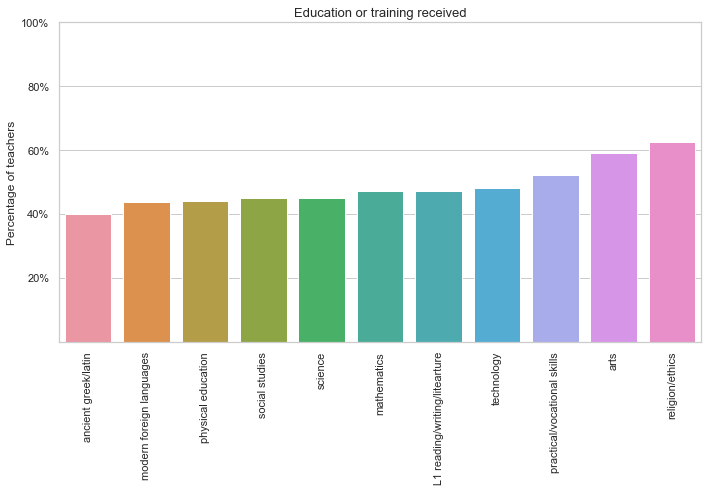

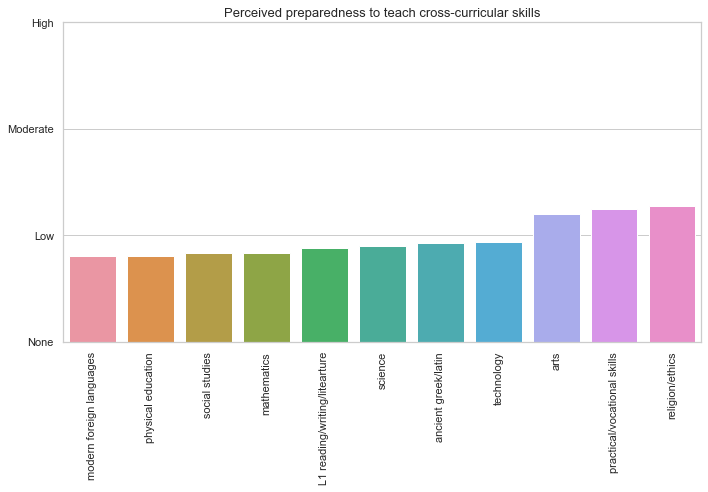

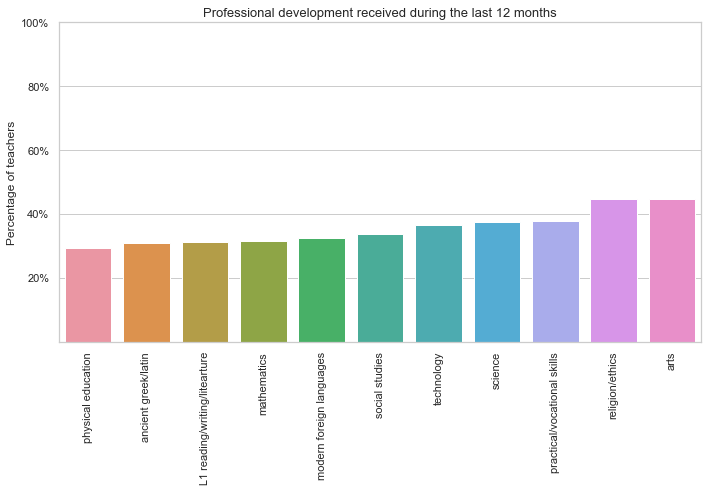

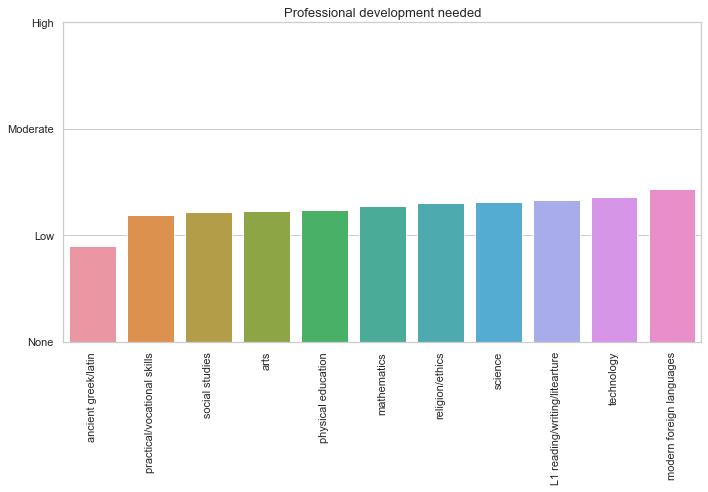

In [17]:
columns = ['formal_ed', 'preparedness', 'prof_dev_received', 'prof_dev_needed']
titles = ['Education or training received', 'Perceived preparedness to teach cross-curricular skills', 'Professional development received during the last 12 months', 'Professional development needed']

for i in range(len(columns)):
    f, ax = plt.subplots(figsize = (10, 7))
    data = rq_aut.dropna(subset = [columns[i]]).groupby(['subject_class'])[columns[i]].mean().reset_index().sort_values(columns[i])
    sns.barplot(x = 'subject_class', y = columns[i], data = data)
    
    sns.set_style('whitegrid')
    sns.set_context('notebook', rc = {'axes.titlesize': 13})
    
    plt.xticks(rotation=90)
    #plt.xlabel('Subject')
    plt.title(titles[i])
    plt.xlabel('')
    
    if columns[i] == 'preparedness' or columns[i] == 'prof_dev_needed':
        ax.set_yticks(range(5))
        ax.set_yticklabels(['X', 'None', 'Low', 'Moderate', 'High'])
        plt.ylim(1, 4)
        plt.ylabel('')
    
    else:
        plt.ylabel('Percentage of teachers')
        ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1])
        ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%'])
    
    plt.tight_layout()
    plt.show();    

    #plt.savefig('rq_aut_{}.png'.format(columns[i]))

## How well prepared are Austrian teachers, who have less than 10 years of teaching experience, to teach cross-curricular skills?

In [18]:
rq_aut_10 = rq_aut[rq_aut.teaching_exp < 10].copy()

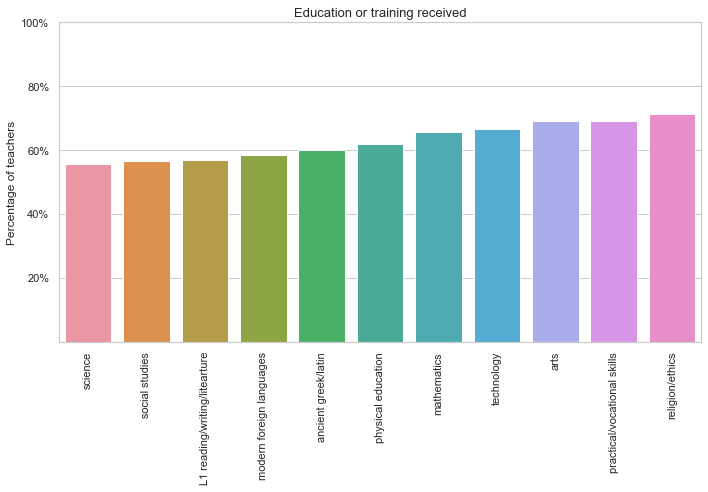

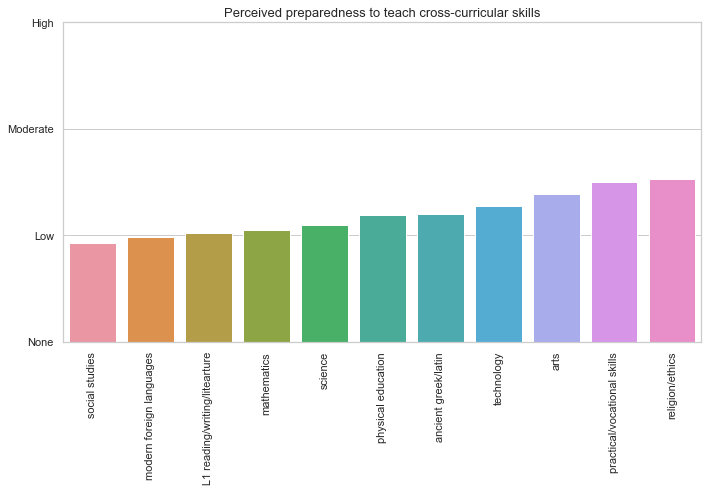

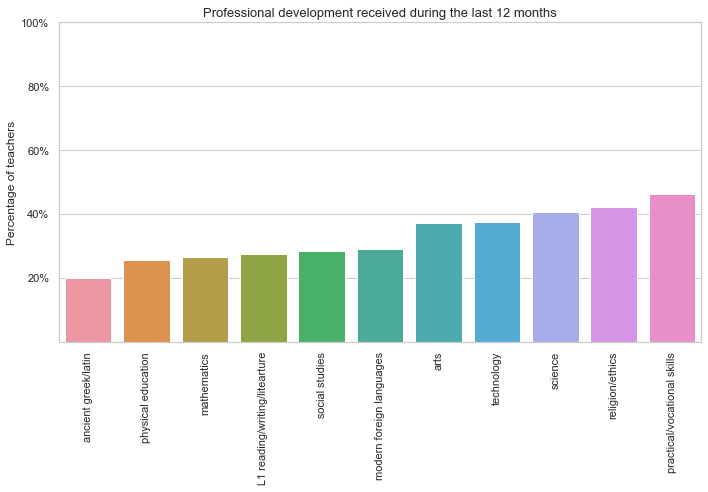

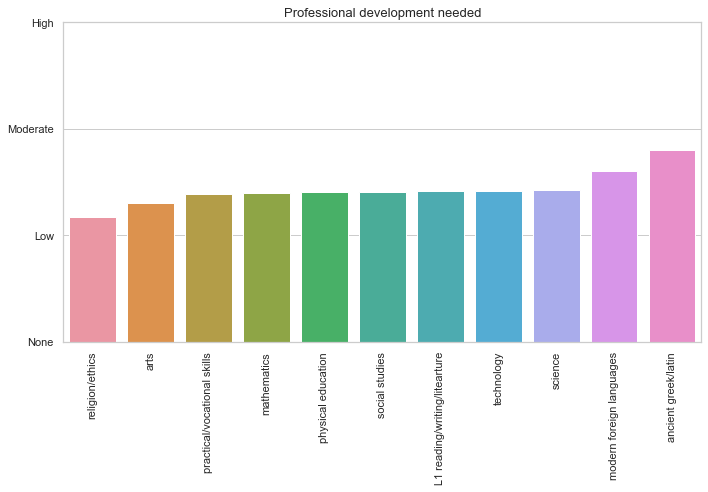

In [19]:
columns = ['formal_ed', 'preparedness', 'prof_dev_received', 'prof_dev_needed']
titles = ['Education or training received', 'Perceived preparedness to teach cross-curricular skills', 'Professional development received during the last 12 months', 'Professional development needed']

for i in range(len(columns)):
    
    f, ax = plt.subplots(figsize = (10, 7))
    data = rq_aut_10.dropna(subset = [columns[i]]).groupby(['subject_class'])[columns[i]].mean().reset_index().sort_values(columns[i])
    sns.barplot(x = 'subject_class', y = columns[i], data = data)
    
    sns.set_style('whitegrid')
    sns.set_context('notebook', rc = {'axes.titlesize': 13})
    
    plt.xticks(rotation=90)
    plt.xlabel('')
    plt.title(titles[i])
    
    if columns[i] == 'preparedness' or columns[i] == 'prof_dev_needed':
        ax.set_yticks(range(5))
        ax.set_yticklabels(['X', 'None', 'Low', 'Moderate', 'High'])
        plt.ylim(1, 4)
        plt.ylabel('')  
    
    else:
        plt.ylabel('Percentage of teachers')
        ax.set_yticks([0.2, 0.4, 0.6, 0.8, 1])
        ax.set_yticklabels(['20%', '40%', '60%', '80%', '100%']) 
    
    plt.tight_layout()
    plt.show();
    
    #plt.savefig('rq_aut_10_{}.png'.format(columns[i]))